<a href="https://colab.research.google.com/github/nprentza/xaimedical/blob/main/notebooks/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data from diabetes_earlystage.csv file on github.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nprentza/xaimedical/main/datasets/diabetes_earlystage.csv'
df = pd.read_csv(url)

Separate features/predictors (x) and target variable (y).

In [ ]:
import pandas as pd

x=df.drop(["patientclass"], axis=1)
y=df.patientclass

Split data into train and test.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Train a Decision Tree model and predict the response for the test set (x_test).

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


Evaluate the Decision Tree model.

In [ ]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 98.07692307692307


Print a text representation of the Decision Tree model.

In [ ]:
from sklearn import tree

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_0 <= 57.50
|   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 40.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  40.00
|   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  57.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_14 >  0.5

Visualize the Decision Tree model with **graphviz**.

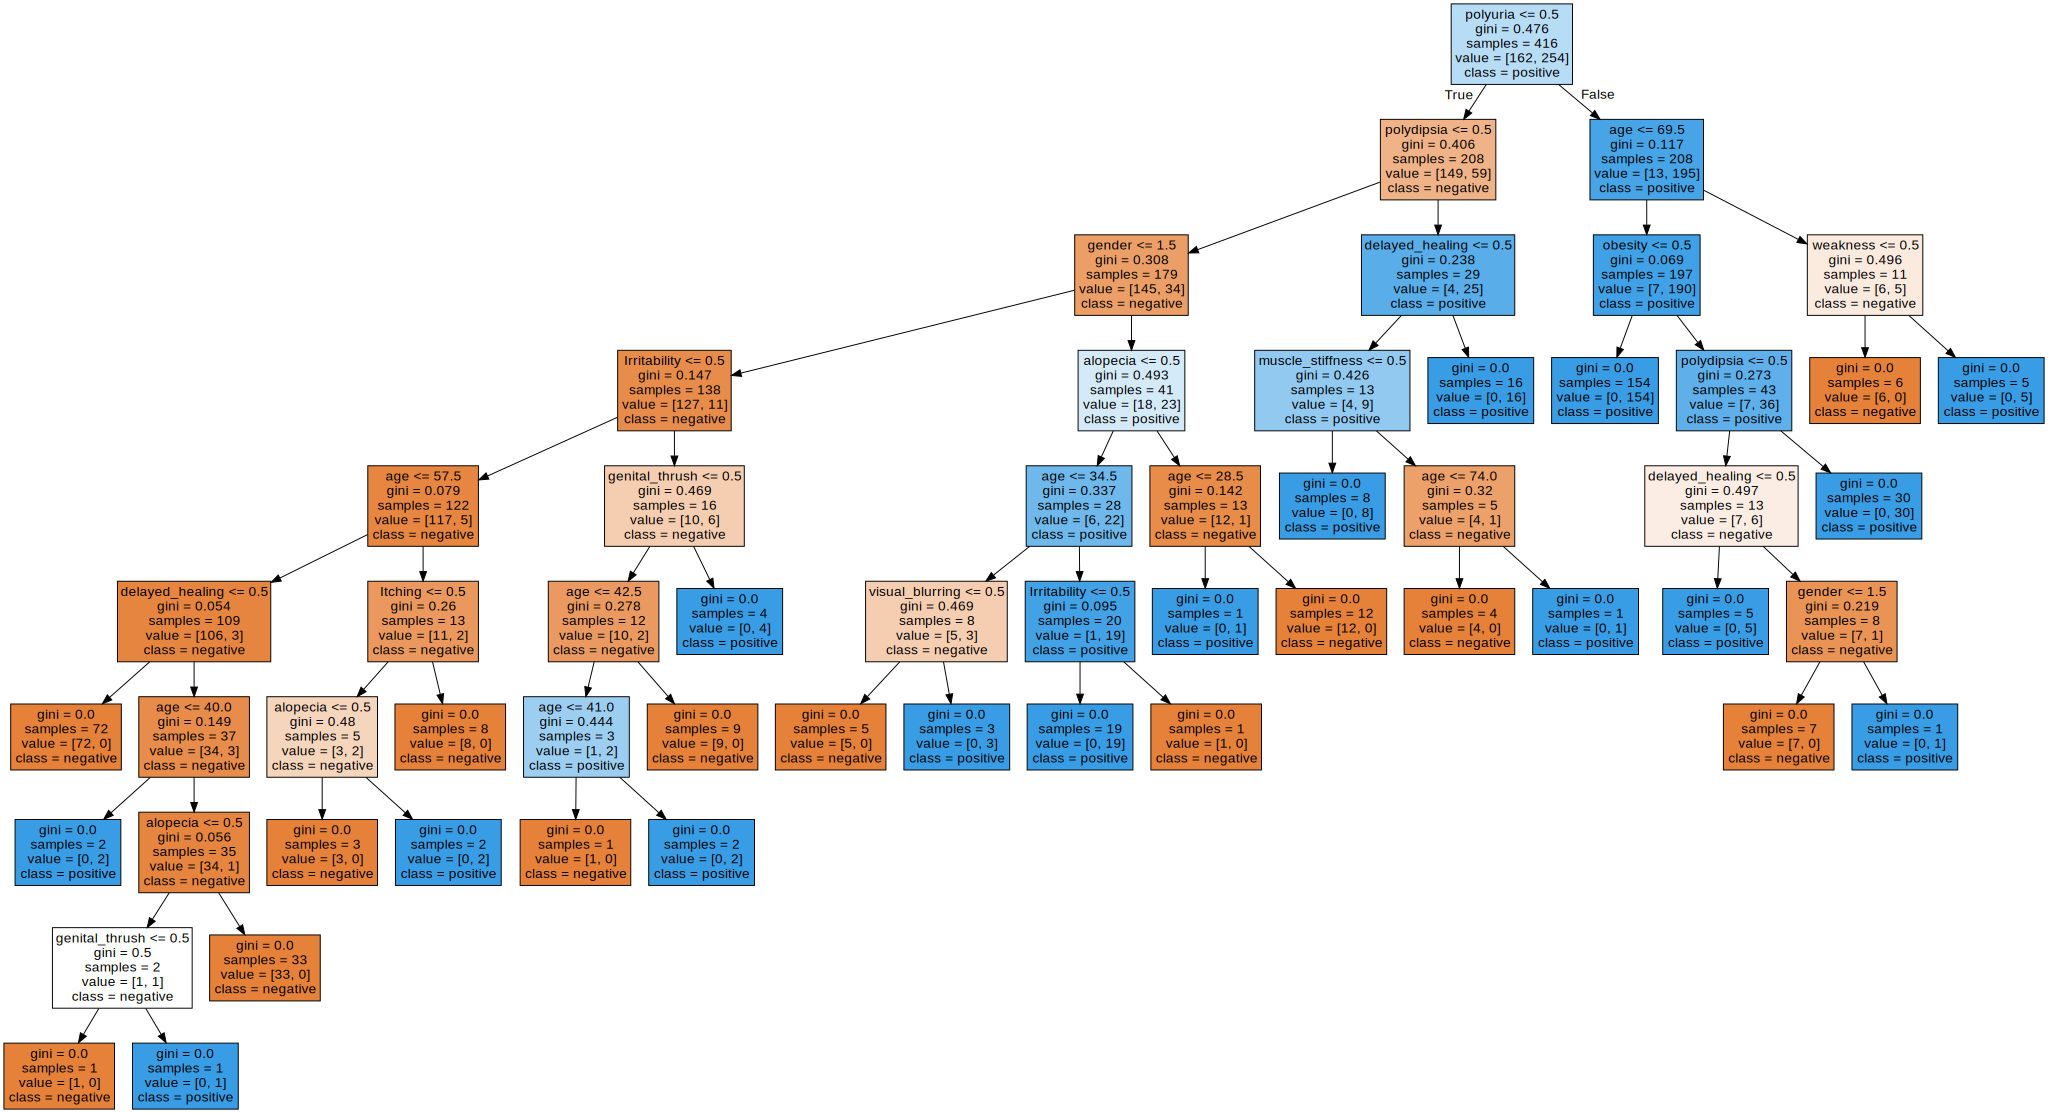

In [ ]:
import graphviz

features=["age","gender","polyuria","polydipsia","sudden_weight_loss","weakness","polyphagia","genital_thrush","visual_blurring","Itching","Irritability","delayed_healing","partial_paresis","muscle_stiffness","alopecia","obesity"]
target="patientclass"

# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=features,
                                class_names=["negative", "positive"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph()

Visualize the Decision Tree model with **dtreeviz**.

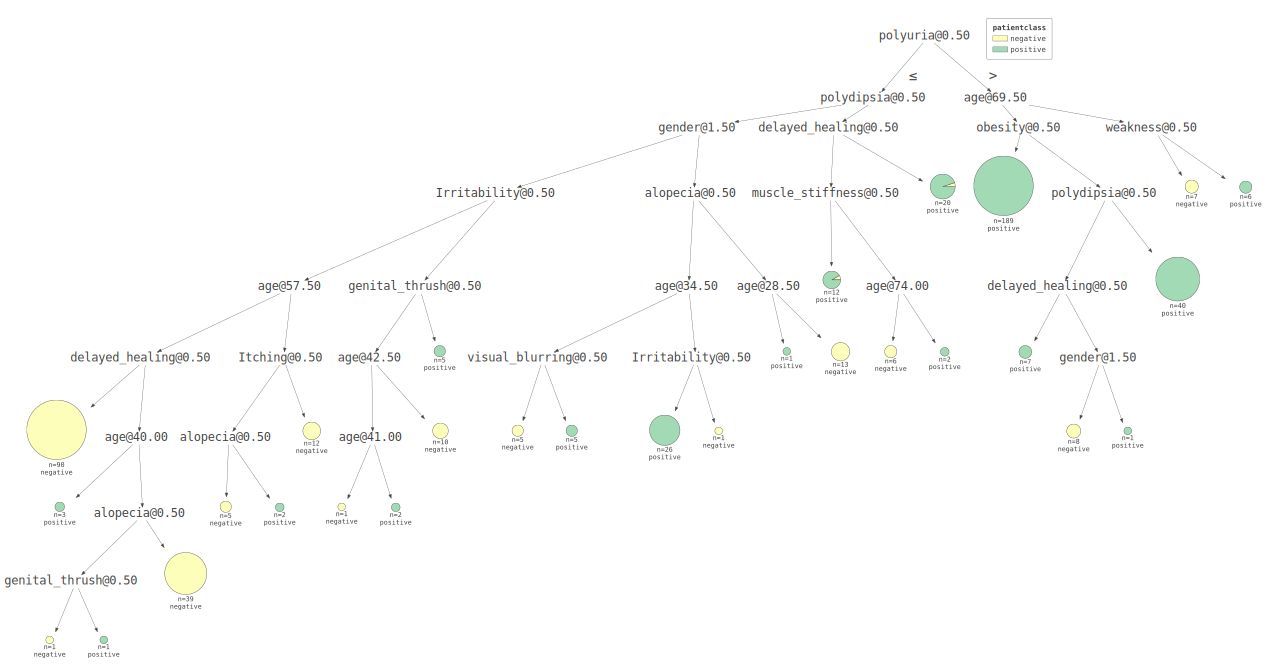

In [ ]:
# !pip install dtreeviz
import dtreeviz
features=["age","gender","polyuria","polydipsia","sudden_weight_loss","weakness","polyphagia","genital_thrush","visual_blurring","Itching","Irritability","delayed_healing","partial_paresis","muscle_stiffness","alopecia","obesity"]
target="patientclass"

viz_model = dtreeviz.model(model,
                           X_train=df[features], y_train=df[target],
                           feature_names=features,
                           target_name=target, class_names=["negative", "positive"])
viz_model.view(fancy=False,fontname="monospace")

Extract a local explanation: the decision path for a particular input.

In [ ]:
print(viz_model.explain_prediction_path(input_10))

age < 69.5
0.5 <= polyuria 
obesity < 0.5



/usr/local/lib/python3.10/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.10/dist-packages/dtreeviz/interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
